In [32]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt

In [33]:
# Reading the input file
prime = pd.read_csv("5' UTR DENV1 DF + DHF.csv", header=None)

# Printing the shape of the data
print("The shape of 5' data is:", str(prime.shape))

The shape of 5' data is: (21, 2)


In [34]:
# Making the disease label column
severity = []
for disease in prime[0]:
    if disease == "DF":
        severity.append(0)
    elif disease == "DHF":
        severity.append(1)
    else:
        continue

dengue = pd.DataFrame(columns = ["Sequence", "Disease"])
dengue["Sequence"] = prime[1]
dengue["Disease"] = severity

dengue = dengue.sample(frac = 1)

print(dengue.head())

   Sequence  Disease
19       AU        0
20       AU        1
8        AU        0
5        AU        1
7        GG        0


In [35]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
#def getKmers(sequence, size = 1):
#    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

#dengue['words'] = dengue.apply(lambda x: getKmers(x['Sequence']), axis=1)
#dengue = dengue.drop('Sequence', axis=1)

#dengue_texts = list(dengue['words'])
#for item in range(len(dengue_texts)):
#    dengue_texts[item] = ' '.join(dengue_texts[item])

In [36]:
print(dengue.head())

   Sequence  Disease
19       AU        0
20       AU        1
8        AU        0
5        AU        1
7        GG        0


The shape of y is: (21,)


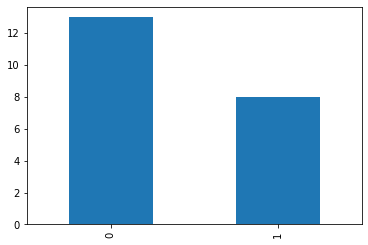

In [37]:
# Creating y and printing the shape of it
y = dengue.iloc[:, 1].values
print("The shape of y is:", y.shape)

# Checking the balance of the disease severity
dengue["Disease"].value_counts().sort_index().plot.bar()

In [38]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(ngram_range=(4,4))
# = cv.fit_transform(dengue_texts)
x = dengue.iloc[:, 0].values

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (21,)


In [39]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Printing the shapes of the train and test matrices
print("The shape of x_train is:", X_train.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of x_test is:", X_test.shape)
print("The shape of y_test is:", y_test.shape)

The shape of x_train is: (16,)
The shape of y_train is: (16,)
The shape of x_test is: (5,)
The shape of y_test is: (5,)


## KNN

In [40]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'mahalanobis', p = 2)
classifier = KNeighborsClassifier(n_neighbors = 17)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

ValueError: could not convert string to float: 'AU'

In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

print('')

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = {} \nprecision = {} \nrecall = {} \nf1 = {}".format(accuracy, precision, recall, f1))

Confusion matrix



NameError: name 'y_pred' is not defined